In [1]:
import COVID19_MX as covid
import pandas as pd 
import os
import datetime as dt
import matplotlib.pyplot as plt
import time
import sys

In [2]:
covid_df, date = covid.getDataFrame()

DataSet Cargado


In [3]:
covid_df.sample(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
449923,2021-03-31,191891,2,12,11,1,11,11,20,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
2538600,2021-03-31,30b53e,2,12,22,2,22,22,14,1,...,1,1,1,2,97,3,99,MÃ©xico,97,97
5319669,2021-03-31,6ab249,2,12,9,2,9,9,3,1,...,2,1,2,2,97,7,99,MÃ©xico,97,97
5153644,2021-03-31,edddf5,2,12,9,2,9,9,17,1,...,1,2,97,1,2,7,99,MÃ©xico,97,97
796287,2021-03-31,0421b2,2,4,9,1,9,9,14,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


In [4]:
covid_df["RESULTADO"] = covid_df["CLASIFICACION_FINAL"].apply(covid.getResult)
covid_df[["CLASIFICACION_FINAL","RESULTADO"]].head(5)

,CLASIFICACION_FINAL,RESULTADO
0,1,1
1,2,1
2,6,3
3,7,2
4,6,3


In [5]:
cCases =  covid.getComulativeCases(covid_df)
covid.printCumulativeCases (cCases)

  Total de casos estudiados: 6089631

  Casos Positivos a SARS-CoV-2: 2238887

  Casos No Positivos a SARS-CoV-2: 3410106

  Casos Con Resultado Pendiente: 440638

  Defunciones Positivas a SARS-CoV-2: 203210

  Tasa de Letalidad: 9.076%

  Tasa de Positividad : 39.633%



In [6]:
dates = covid.getDateList(date)
dates[0:5]

['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05']

In [7]:
inicio = time.time()
nacional = covid.getCasesByDay(covid_df, dates)
final = time.time()

In [8]:
print((final-inicio))
#421.18 antes

1.8653509616851807


In [9]:
nacional_df = pd.DataFrame(nacional)
nacional_df.sample(5)

,FECHA,CASOS_POSITIVOS,CASOS_NEGATIVOS,CASOS_SOSPECHOSOS,DEFUNCIONES
81,2020-03-22,176,923,641,2
225,2020-08-13,4787,5419,959,591
107,2020-04-17,1260,1607,1316,118
413,2021-02-17,5370,14813,897,644
326,2020-11-22,6973,8115,924,570


In [14]:
zmMty = covid.getCasesByDay(covid_df, dates, state = 19, countys = [6,18,19,21,26,31,39,41,45,46,48,49])

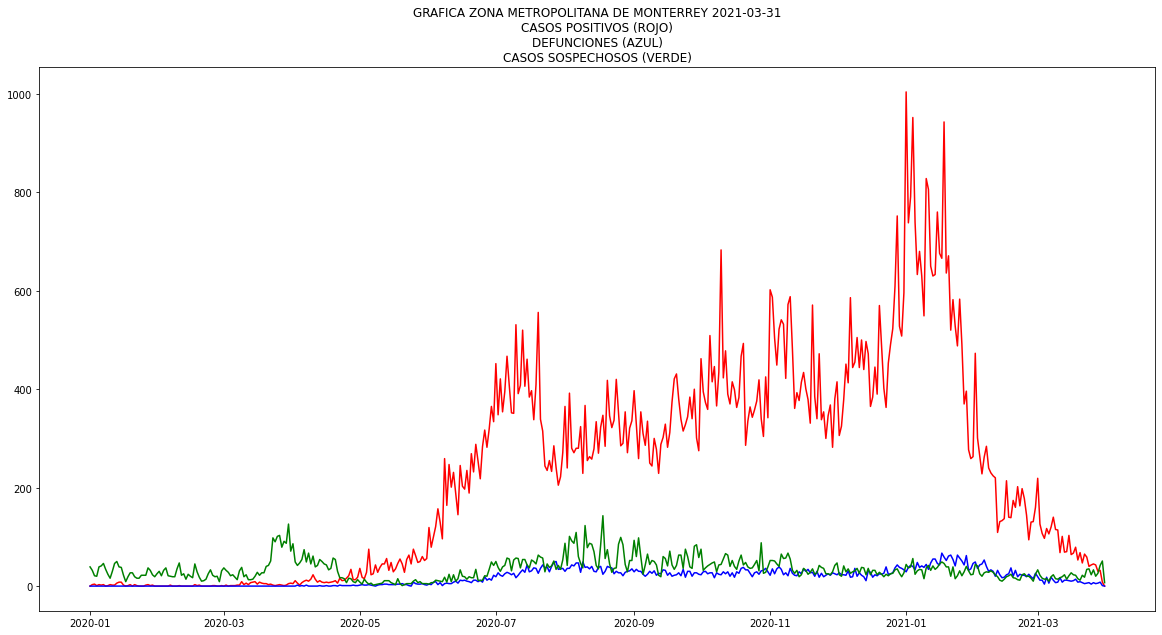

In [18]:
casesBD_df = pd.DataFrame(zmMty)
name = "ZONA METROPOLITANA DE MONTERREY"
plt.figure(figsize = (20,10))
casesBD_df["FECHA"] = pd.to_datetime(casesBD_df["FECHA"], unit='ns')
plt.plot(casesBD_df["FECHA"],casesBD_df["CASOS_POSITIVOS"],"r")
plt.plot(casesBD_df["FECHA"],casesBD_df["DEFUNCIONES"],"b")
plt.plot(casesBD_df["FECHA"],casesBD_df["CASOS_SOSPECHOSOS"],"g")
plt.title("GRAFICA " + name +" "+ date + "\nCASOS POSITIVOS (ROJO)\nDEFUNCIONES (AZUL)\nCASOS SOSPECHOSOS (VERDE)")
plt.show()

In [19]:
casesBD_df.tail(20)

,FECHA,CASOS_POSITIVOS,CASOS_NEGATIVOS,CASOS_SOSPECHOSOS,DEFUNCIONES
436,2021-03-12,101,324,19,8
437,2021-03-13,69,292,23,12
438,2021-03-14,70,380,14,12
439,2021-03-15,103,490,21,11
440,2021-03-16,64,508,27,10
441,2021-03-17,67,403,23,11
442,2021-03-18,79,400,22,14
443,2021-03-19,53,398,15,8
444,2021-03-20,68,437,12,9
445,2021-03-21,47,434,22,7
